In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [96]:
def get_masked_image(path):
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 5)
    sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

    _, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)

    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
    
    return image, mask

def get_average_color(image, mask):
    red = np.sum(image[:, :, 0] * mask[:, :, 0]) / np.sum(mask[:, :, 0])
    green = np.sum(image[:, :, 1] * mask[:, :, 1]) / np.sum(mask[:, :, 1])
    blue = np.sum(image[:, :, 2] * mask[:, :, 2]) / np.sum(mask[:, :, 2])

    return [red, green, blue]

In [97]:
average_pixels = []
path = "./data_orange_peels"
for subdir in os.listdir(path):
    for file in os.listdir(os.path.join(path, subdir)):
        try:
            image, mask = get_masked_image(os.path.join(path, subdir, file))
            average_pixels.append(get_average_color(image, mask / 255).append(subdir))
        except Exception as e:
            print("Error occured with image {}: {}".format("{}/{}".format(subdir, file), e))

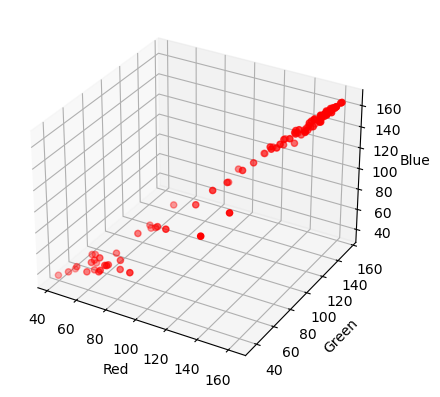

In [94]:
fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
reds = [ pixel[0] for pixel in average_pixels ]
greens = [ pixel[1] for pixel in average_pixels ]
blues = [ pixel[2] for pixel in average_pixels ]
ax.scatter(reds, greens, blues, c = "r", marker = "o")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()